이번에는 tensorflow에서 제공 해주는 기본 데이터인 mnist를 이용해 실습을 해보자.
(이와같은 데이터는 kaggle에서도 많이 구할 수 있다.)

MNIST설명 - 손글씨 데이터이다.
기본적으로 이미지는 (가로, 세로, RGB)로 이루어진 3차원 데이터이다. 
하지만, MNIST는 흑백사진이여서 2차원이다. (가로, 세로)
그래서 쉽게 학습 시킬 수 있다.

In [5]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data loading & train data set, test data set
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)
# 텐서플로우에서 제공되는 MNIST의 One_hot_encoding버전 학습 데이터 다운

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


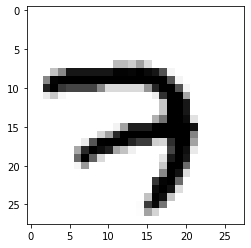

In [14]:
img1 = mnist.train.images[0] # MNIST의 train 속성 데이터의 1번째 이미지를 저장한다.

plt.imshow(img1.reshape(28,28), cmap="Greys") # mnist의 이미지들은 1차원 이미지이므로 2차원으로 변환하고, 흑백이미지로 불러온다.
plt.show() # 이미지 출력

In [56]:
## Place holder
X = tf.placeholder(shape=[None, 784], dtype = tf.float32)
Y = tf.placeholder(shape=[None, 10], dtype = tf.float32)


## Weight & bias
W = tf.Variable(tf.random_normal([784, 10]), name = "weight")
b = tf.Variable(tf.random_normal([10]), name = "weight")


## Hypothesis
logit = tf.matmul(X, W) + b
H = tf.nn.softmax(logit)


## cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=Y))


##train 
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)


## Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [57]:
## 학습
# epoch : 1 epoch는 training data를 이용해서 1번 학습하는 것.
train_epoch = 50 # 학습을 몇번 할 것인가.
batch_size = 100 # 55000의 데이터를 한번에 학습하기가 쉽지 않다. 그래서 한번의 epoch때에도 학습을 나누어서 한다. 100개씩 550번 학습

for step in range(train_epoch) :    
    num_of_iter = int(mnist.train.num_examples/batch_size) # 여기에서는 550이다.
    
    for i in range(num_of_iter) :
        batch_x, batch_y = mnist.train.next_batch(batch_size) # mnist에서는 배치크기에 따라 데이터들을 자동으로 만들어주는 함수가 있다.
        
        tmp_train, cost_val = sess.run([train, cost],
                                      feed_dict = {X: batch_x,
                                                  Y : batch_y})

    if step % 3 == 0:
        print("cost 값은 {}".format(cost_val))

cost 값은 0.5776849985122681
cost 값은 0.5908656120300293
cost 값은 0.47726982831954956
cost 값은 0.622123122215271
cost 값은 0.37512415647506714
cost 값은 0.5393787622451782
cost 값은 0.4284000098705292
cost 값은 0.7376624941825867
cost 값은 0.192085400223732
cost 값은 0.4835072457790375
cost 값은 0.34338927268981934
cost 값은 0.3458527624607086
cost 값은 0.4825902581214905
cost 값은 0.2597339153289795
cost 값은 0.4371829926967621
cost 값은 0.20351722836494446
cost 값은 0.3704228699207306


In [58]:
## 정확도 측정
predict = tf.argmax(H, axis =1)
correct = tf.equal(predict, tf.argmax(Y, axis = 1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print(sess.run(accuracy, feed_dict = {X: mnist.test.images , Y: mnist.test.labels}))

0.9089


이번에는 이미지를 1차원 배열로 바꾸어서 입력하였다.
그래서 만약에 한번에 넣었다면 학습 데이터로 [55000, 784]개가 한번에 들어가고, 출력값(결과값)이 [1, 784]가 되었을 것이다.

하지만 배치사이즈를 설정 함으로써, 학습데이터를 쪼개서 넣었다.
배치 싸이즈를 100으로 설정함으로써 한번에 입력되는 학습데이터는 [100, 784]가 되었고, 한번의 epoch에서도 학습이 550회가 이루어졌다.
어떻게 보면 학습한 횟수만 따지자면 epoch * batch = 5000 회라고 볼 수 있다.
